## 蘑菇分类模型

In [1]:
import pandas as pd

df = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1321/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,w,f,c,f,c,n,p,...,s,w,w,p,w,o,p,n,s,d
1,p,x,s,e,f,s,f,c,n,b,...,k,w,w,p,w,o,e,w,v,p
2,p,k,s,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
3,p,f,f,g,f,f,f,c,b,p,...,k,b,n,p,w,o,l,h,y,g
4,e,f,f,n,f,n,f,w,b,h,...,s,w,w,p,w,o,e,k,s,g


其中，`class=e` 表示可食用，`class=p` 表示有毒。其余列为特征数据。 

接下来，你需要利用该数据集训练一个毒蘑菇分类器，并使用 Flask 将保存好的模型部署为 API 接口，可通过 HTTP 请求的方式获得推理结果。

本次挑战推荐在线下完成，同时你需要使用 scikit-learn 训练并保存模型，最终使用 Flask 完成 Web 应用构建。启动 Flask 后，可在本地向 `localhost` 发起 POST 请求获得推理结果。测试时推荐使用原数据集中的样本，传入数据需为 JSON 类型。

<pre style="font-size:14px; line-height:17px;" class="hljs">
import json
import requests
import pandas as pd

df = pd.read_csv("https://labfile.oss.aliyuncs.com/courses/1321/mushrooms_test.csv")  # 读取测试数据集
sample_data = df.sample(1).to_json()  # 从原数据中随机取 1 条用于测试推理，并转换成 JSON 样式
sample_json = json.loads(sample_data)  # 将 Pandas 转换的 JSON 样式数据处理成 JSON 类型
requests.post(url="http://localhost:5000", json=sample_json).content  # 建立 POST 请求，并发送数据请求
</pre>

In [2]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
X=pd.get_dummies(df.iloc[:,1:])
y=df['class']

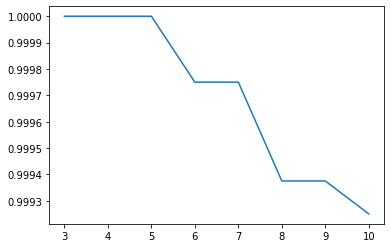

In [14]:
scores=[]
for i in range(3,11):
    knn=KNeighborsClassifier(i)
    scores.append(cross_val_score(knn,X,y,cv=5).mean())
plt.plot([i for i in range(3,11)],scores)

In [15]:
rf=RandomForestClassifier()
cross_val_score(rf,X,y,cv=5).mean()

1.0

In [16]:
knn=KNeighborsClassifier(5)
knn.fit(X,y)
joblib.dump(knn,'mushroom_knn.pkl')

['mushroom_knn.pkl']

In [22]:
%%writefile mushroom_predict.py
import joblib 
import pandas as pd
from flask import Flask,request,jsonify

app=Flask(__name__)

@app.route('/',methods=['POST'])

def ml_inference():
    query_df=pd.DataFrame(request.json)
    df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1321/mushrooms.csv')
    X=pd.get_dummies(df.iloc[:,1:])
    query=pd.get_dummies(query_df).reindex(columns=X.columns,fill_value=0)
    
    clf=joblib.load('mushroom_knn.pkl')
    predict=clf.predict(query)
    return jsonify({'result':[predict]})

Overwriting mushroom_predict.py


In [23]:
import time
import subprocess as sp

server=sp.Popen('FLASK_APP=mushroom_predict.py flask run',shell=True)
time.sleep(5)
server

In [28]:
import json

df_test=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1321/mushrooms_test.csv')
sample_data=df.sample(20).to_json(orient='records')
sample_json=json.loads(sample_data)
sample_json

[{'class': 'p',
  'cap-shape': 'f',
  'cap-surface': 'y',
  'cap-color': 'g',
  'bruises': 'f',
  'odor': 'f',
  'gill-attachment': 'f',
  'gill-spacing': 'c',
  'gill-size': 'b',
  'gill-color': 'h',
  'stalk-shape': 'e',
  'stalk-root': 'b',
  'stalk-surface-above-ring': 'k',
  'stalk-surface-below-ring': 'k',
  'stalk-color-above-ring': 'b',
  'stalk-color-below-ring': 'p',
  'veil-type': 'p',
  'veil-color': 'w',
  'ring-number': 'o',
  'ring-type': 'l',
  'spore-print-color': 'h',
  'population': 'v',
  'habitat': 'g'},
 {'class': 'e',
  'cap-shape': 'x',
  'cap-surface': 'y',
  'cap-color': 'e',
  'bruises': 't',
  'odor': 'n',
  'gill-attachment': 'f',
  'gill-spacing': 'c',
  'gill-size': 'b',
  'gill-color': 'p',
  'stalk-shape': 't',
  'stalk-root': 'b',
  'stalk-surface-above-ring': 's',
  'stalk-surface-below-ring': 's',
  'stalk-color-above-ring': 'g',
  'stalk-color-below-ring': 'p',
  'veil-type': 'p',
  'veil-color': 'w',
  'ring-number': 'o',
  'ring-type': 'p',
  'spo

In [30]:
import requests

requests.post(url='http://localhost:5000',json=sample_json).content

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>500 Internal Server Error</title>\n<h1>Internal Server Error</h1>\n<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>\n'

In [31]:
server.terminate()